In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.npy', 'labels.npy']


In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import SeparableConv2D,Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers import LeakyReLU
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class NewNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		model.add(SeparableConv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.15))


		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.20))


		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))   # add an advanced activation
		model.add(BatchNormalization())
		model.add(Dropout(0.35))

		
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

Using TensorFlow backend.


In [3]:
!pip install imutils
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,Adadelta
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from project.unet import Unet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
from keras import backend as K

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)


# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,help="path to input dataset")
#ap.add_argument("-m", "--model", required=True,help="path to output model")
#ap.add_argument("-p", "--plot", type=str, default="plot.png",help="path to output loss/accuracy plot")
#args = vars(ap.parse_args())
EPOCHS = 32
INIT_LR = 1e-3 #Initial Learning rate
BS = 32 # Bach size to feed

# initialize the data and labels
print("Load images' NPY file")
data = []
labels = []
# grab the image paths and randomly shuffle them
#imagePaths = sorted(list(paths.list_images(r"C:\\Users\\dell\\Desktop\\ML_CS\\ML project\\ProjCNN\\New folder\\images")))
random.seed(42)
#random.shuffle(imagePaths)

# loop over the input images
#for imagePath in imagePaths:
	# load the image, pre-process it, and store it in the data list
	#image = cv2.imread(imagePath)
	#image = cv2.resize(image, (128, 128))
	#image = img_to_array(image)
	#data.append(image)

	# extract the class label from the image path and update the
	# labels list
	#label = imagePath.split(os.path.sep)[-2]
	#label = 1 if label == "malignant" else 0
	#labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
#data = np.array(data, dtype="float") / 255.0
#np.save('data.npy',data)
#labels = np.array(labels)
#np.save('labels.npy',labels)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
data=np.load('../input/data.npy')
labels=np.load('../input/labels.npy')
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=6)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

# initialize the model
print("Compiling model...")
model = NewNet.build(width=128, height=128, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS) #Optimise uisng Adam
#opt=Adadelta(lr=INIT_LR, rho=0.95, epsilon=None, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    
# train the network
print("Training network")
#checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              #patience=5, min_lr=0.001)
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX)//BS,
	epochs=EPOCHS, verbose=1,callbacks=[tensorboard])

label_name=["benign","malicious"]


# save the model to disk
print("Save the model for the applied CNN")
#model.save(args["model.hdf5"])


print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128) #Check this
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1)))

cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
#plt.title("Training Loss and Accuracy on Malignnat/Benign")
#plt.xlabel("Epoch #")
#plt.ylabel("Loss/Accuracy")
#plt.legend(loc="lower left")
#plt.savefig(args["plot.png"])
#keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
scores = model.evaluate(testX, testY, verbose = 10 )
print (scores)


  Stored in directory: /tmp/.cache/pip/wheels/b2/40/59/139d450e68847ef2f27d876d527b13389dac23df0f66526b5d
Successfully built imutils
Load images' NPY file
Compiling model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Training network
Instructions for updating:
Use tf.cast instead.
Epoch 1/32
52/52 [==============================] - 17s 323ms/step - loss: 0.6813 - acc: 0.7488 - val_loss: 0.6012 - val_acc: 0.7581
Epoch 2/32
52/52 [==============================] - 13s 241ms/step - loss: 0.4609 - acc: 0.8043 - val_loss: 0.7199 - val_acc: 0.8190
Epoch 3/32
52/52 [==============================] - 12s 239ms/step - loss: 0.4687 - acc: 0.7953 - val_loss: 0.4405 - val_acc: 0.7975
Epoch 4/32
52/52 [==============================] - 12s 238ms/step - loss: 0.4443 - acc: 0.7953 - val_loss: 0.3742 - val_acc: 0.8280
Epoch 5/32
52/52 [========================

In [4]:
model.summary()
K.clear_session()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 128, 128, 32)      155       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 128, 128, 32)      1344      
__________

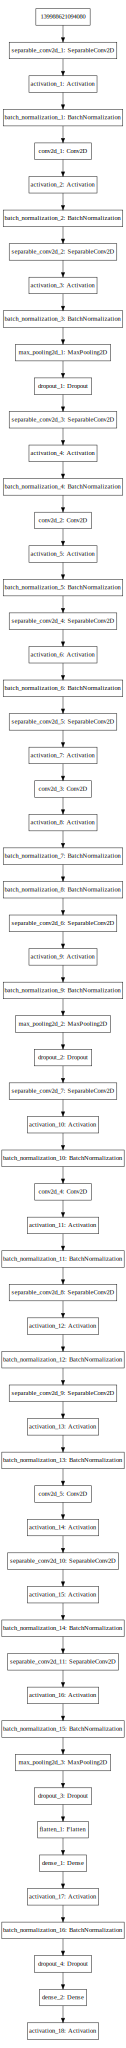

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


--2019-03-26 17:24:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.231.75.48, 52.207.111.186, 52.72.145.109, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.231.75.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13584026 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.95M  17.9MB/s    in 0.7s    

2019-03-26 17:24:42 (17.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13584026/13584026]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://4c69188a.ngrok.io
